## Import libraries

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor



## Import and prepare data

In [ ]:
data = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-03-12/board_games.csv'
!curl $data > data.csv

In [4]:
df_original = pd.read_csv('data.csv')

In [5]:
df_original.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195


In [6]:
df = df_original[[
           'max_players',
           'max_playtime',
           'min_age',
           'min_players',
           'min_playtime',
           'playing_time',
           'year_published',
           'category',
           'mechanic',
           'average_rating',
           'users_rated']]


In [7]:
df.dtypes

max_players         int64
max_playtime        int64
min_age             int64
min_players         int64
min_playtime        int64
playing_time        int64
year_published      int64
category           object
mechanic           object
average_rating    float64
users_rated         int64
dtype: object

In [8]:
categorical_columns   = [
           'name',           
           'category',
           'mechanic']


## Exploratory data analysis

In [9]:
%matplotlib inline

In [10]:
df.average_rating.mean()

6.370855970375998

<AxesSubplot:xlabel='average_rating', ylabel='Count'>

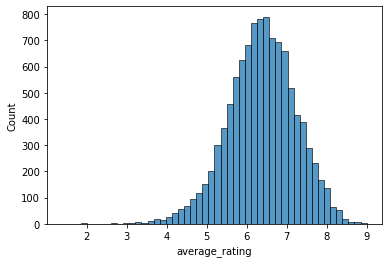

In [11]:
sns.histplot(df.average_rating, bins=50)

<AxesSubplot:xlabel='year_published', ylabel='Count'>

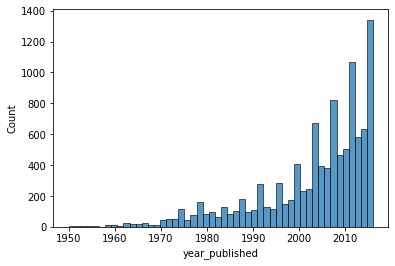

In [12]:
sns.histplot(df.year_published, bins=50)

<AxesSubplot:xlabel='users_rated', ylabel='Count'>

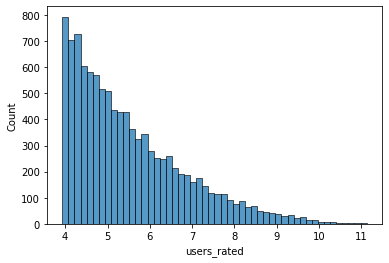

In [13]:
user_logs = np.log1p(df.users_rated)
sns.histplot(user_logs, bins=50)

<AxesSubplot:xlabel='playing_time', ylabel='Count'>

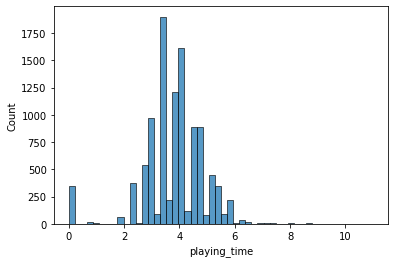

In [14]:
PT_logs = np.log1p(df.playing_time)
sns.histplot(PT_logs, bins=50)

#### Missing values

In [15]:
df.isnull().sum()

max_players         0
max_playtime        0
min_age             0
min_players         0
min_playtime        0
playing_time        0
year_published      0
category           94
mechanic          950
average_rating      0
users_rated         0
dtype: int64

In [16]:
df = df.fillna(method="ffill")
df.isnull().sum()

max_players       0
max_playtime      0
min_age           0
min_players       0
min_playtime      0
playing_time      0
year_published    0
category          0
mechanic          0
average_rating    0
users_rated       0
dtype: int64

In [17]:
df.head()

,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,year_published,category,mechanic,average_rating,users_rated
0,5,240,14,3,240,240,1986,"Economic,Negotiation,Political","Area Control / Area Influence,Auction/Bidding,...",7.66508,4498
1,4,30,12,3,30,30,1981,"Card Game,Fantasy",Trick-taking,6.60815,478
2,4,60,10,2,30,60,1998,"Abstract Strategy,Medieval","Area Control / Area Influence,Hand Management,...",7.44119,12019
3,4,60,12,2,60,60,1992,Ancient,"Action Point Allowance System,Area Control / A...",6.60675,314
4,6,90,12,3,90,90,1964,Economic,"Hand Management,Stock Holding,Tile Placement",7.35830,15195


In [18]:
df.shape

(10532, 11)

In [19]:
df.iloc[29]

max_players                                                       5
max_playtime                                                     90
min_age                                                          10
min_players                                                       2
min_playtime                                                     90
playing_time                                                     90
year_published                                                 1992
category          Adventure,Exploration,Fantasy,Fighting,Miniatures
mechanic                                 Dice Rolling,Grid Movement
average_rating                                              5.18525
users_rated                                                     590
Name: 29, dtype: object

## Encode categorical features 

### Category variable eg. 'Adventure', 'Educational', 'Puzzle'

In [20]:
# Get a list of the categories
category   = sorted(set(",".join(df.category).split(",")))

# Convert to binary readout: 0 = not category, 1 = category 
for c in category:
    df[c] = df.category.str.contains(c).astype(int)
    
category

['Abstract Strategy',
 'Action / Dexterity',
 'Adventure',
 'Age of Reason',
 'American Civil War',
 'American Indian Wars',
 'American Revolutionary War',
 'American West',
 'Ancient',
 'Animals',
 'Arabian',
 'Aviation / Flight',
 'Bluffing',
 'Book',
 'Card Game',
 "Children's Game",
 'City Building',
 'Civil War',
 'Civilization',
 'Collectible Components',
 'Comic Book / Strip',
 'Deduction',
 'Dice',
 'Economic',
 'Educational',
 'Electronic',
 'Environmental',
 'Expansion for Base-game',
 'Exploration',
 'Fantasy',
 'Farming',
 'Fighting',
 'Game System',
 'Horror',
 'Humor',
 'Industry / Manufacturing',
 'Korean War',
 'Mafia',
 'Math',
 'Mature / Adult',
 'Maze',
 'Medical',
 'Medieval',
 'Memory',
 'Miniatures',
 'Modern Warfare',
 'Movies / TV / Radio theme',
 'Murder/Mystery',
 'Music',
 'Mythology',
 'Napoleonic',
 'Nautical',
 'Negotiation',
 'Novel-based',
 'Number',
 'Party Game',
 'Pike and Shot',
 'Pirates',
 'Political',
 'Post-Napoleonic',
 'Prehistoric',
 'Print & 

### Mechanic variable eg. 'Campaign', 'Player Elimination', 'Commodity Speculation'

In [21]:
mechanic   = sorted(set(",".join(df.mechanic).split(",")))
for m in mechanic:
    df[m] = df.mechanic.str.contains(m).astype(int)

mechanic

['Acting',
 'Action / Movement Programming',
 'Action Point Allowance System',
 'Area Control / Area Influence',
 'Area Enclosure',
 'Area Movement',
 'Area-Impulse',
 'Auction/Bidding',
 'Betting/Wagering',
 'Campaign / Battle Card Driven',
 'Card Drafting',
 'Chit-Pull System',
 'Co-operative Play',
 'Commodity Speculation',
 'Crayon Rail System',
 'Deck / Pool Building',
 'Dice Rolling',
 'Grid Movement',
 'Hand Management',
 'Hex-and-Counter',
 'Line Drawing',
 'Memory',
 'Modular Board',
 'Paper-and-Pencil',
 'Partnerships',
 'Pattern Building',
 'Pattern Recognition',
 'Pick-up and Deliver',
 'Player Elimination',
 'Point to Point Movement',
 'Press Your Luck',
 'Rock-Paper-Scissors',
 'Role Playing',
 'Roll / Spin and Move',
 'Route/Network Building',
 'Secret Unit Deployment',
 'Set Collection',
 'Simulation',
 'Simultaneous Action Selection',
 'Singing',
 'Stock Holding',
 'Storytelling',
 'Take That',
 'Tile Placement',
 'Time Track',
 'Trading',
 'Trick-taking',
 'Variable P

In [22]:
df.shape

(10532, 144)

In [23]:
game_col = list(df.dtypes[df.dtypes == 'int64'].index)
game_col

['max_players',
 'max_playtime',
 'min_age',
 'min_players',
 'min_playtime',
 'playing_time',
 'year_published',
 'users_rated',
 'Abstract Strategy',
 'Action / Dexterity',
 'Adventure',
 'Age of Reason',
 'American Civil War',
 'American Indian Wars',
 'American Revolutionary War',
 'American West',
 'Ancient',
 'Animals',
 'Arabian',
 'Aviation / Flight',
 'Bluffing',
 'Book',
 'Card Game',
 "Children's Game",
 'City Building',
 'Civil War',
 'Civilization',
 'Collectible Components',
 'Comic Book / Strip',
 'Deduction',
 'Dice',
 'Economic',
 'Educational',
 'Electronic',
 'Environmental',
 'Expansion for Base-game',
 'Exploration',
 'Fantasy',
 'Farming',
 'Fighting',
 'Game System',
 'Horror',
 'Humor',
 'Industry / Manufacturing',
 'Korean War',
 'Mafia',
 'Math',
 'Mature / Adult',
 'Maze',
 'Medical',
 'Medieval',
 'Memory',
 'Miniatures',
 'Modern Warfare',
 'Movies / TV / Radio theme',
 'Murder/Mystery',
 'Music',
 'Mythology',
 'Napoleonic',
 'Nautical',
 'Negotiation',
 '

## Feature importance: Mutual information

In [24]:
def mutual_info_av_rating_score(series):
    return mutual_info_score(series, df.average_rating > np.median(df.average_rating))

In [25]:
mi = df[game_col].apply(mutual_info_av_rating_score).round(2)
mi.sort_values(ascending=False)

users_rated                  0.16
year_published               0.06
min_age                      0.05
max_playtime                 0.05
playing_time                 0.05
                             ... 
Music                        0.00
Murder/Mystery               0.00
Movies / TV / Radio theme    0.00
Modern Warfare               0.00
Puzzle                       0.00
Length: 141, dtype: float64

## Feature importance: Correlation

In [51]:
corr = df[game_col].corr()
corr

,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,year_published,users_rated,Abstract Strategy,Action / Dexterity,...,Storytelling,Take That,Tile Placement,Time Track,Trading,Trick-taking,Variable Phase Order,Variable Player Powers,Voting,Worker Placement
max_players,1.000000,-0.003646,-0.008389,0.063518,-0.004041,-0.003646,0.017946,-0.003682,-0.027364,0.019626,...,0.030204,-0.001744,-0.018000,-0.003859,0.003100,-0.000309,-0.000658,0.011945,0.079339,-0.011637
max_playtime,-0.003646,1.000000,0.041610,0.060724,0.975336,1.000000,-0.051373,-0.004342,-0.024928,-0.023565,...,-0.007030,-0.011663,-0.015052,-0.000525,-0.000840,-0.011219,0.002006,-0.002530,-0.005265,-0.001483
min_age,-0.008389,0.041610,1.000000,0.054614,0.037476,0.041610,-0.008630,0.073209,-0.116831,-0.185717,...,0.040009,0.025175,-0.031085,0.015497,0.018602,-0.015329,0.054706,0.093318,0.059754,0.078134
min_players,0.063518,0.060724,0.054614,1.000000,0.067274,0.060724,0.026440,0.001996,-0.048542,-0.017573,...,0.102886,0.036038,-0.040424,-0.029381,0.055886,0.092627,-0.025233,-0.003594,0.243100,-0.036556
min_playtime,-0.004041,0.975336,0.037476,0.067274,1.000000,0.975336,-0.055729,-0.007752,-0.022337,-0.020981,...,-0.006611,-0.011792,-0.013485,-0.001708,-0.000412,-0.009791,0.000448,-0.006300,-0.004334,-0.004672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trick-taking,-0.000309,-0.011219,-0.015329,0.092627,-0.009791,-0.011219,0.001796,-0.017363,-0.024070,-0.019980,...,-0.010380,-0.004531,-0.038130,-0.009668,-0.026069,1.000000,-0.018351,-0.030281,-0.010960,-0.021224
Variable Phase Order,-0.000658,0.002006,0.054706,-0.025233,0.000448,0.002006,0.067699,0.065535,-0.020819,-0.015485,...,-0.011462,-0.006445,-0.009712,0.018621,0.020416,-0.018351,1.000000,0.086276,0.010535,0.087337
Variable Player Powers,0.011945,-0.002530,0.093318,-0.003594,-0.006300,-0.002530,0.136210,0.107891,-0.060152,-0.034672,...,0.011811,0.065121,-0.034038,0.035319,0.017372,-0.030281,0.086276,1.000000,0.042845,0.013473
Voting,0.079339,-0.005265,0.059754,0.243100,-0.004334,-0.005265,0.026334,0.022753,-0.037027,-0.018104,...,0.165237,-0.003439,-0.031615,0.022996,0.048362,-0.010960,0.010535,0.042845,1.000000,0.000938


<AxesSubplot:>

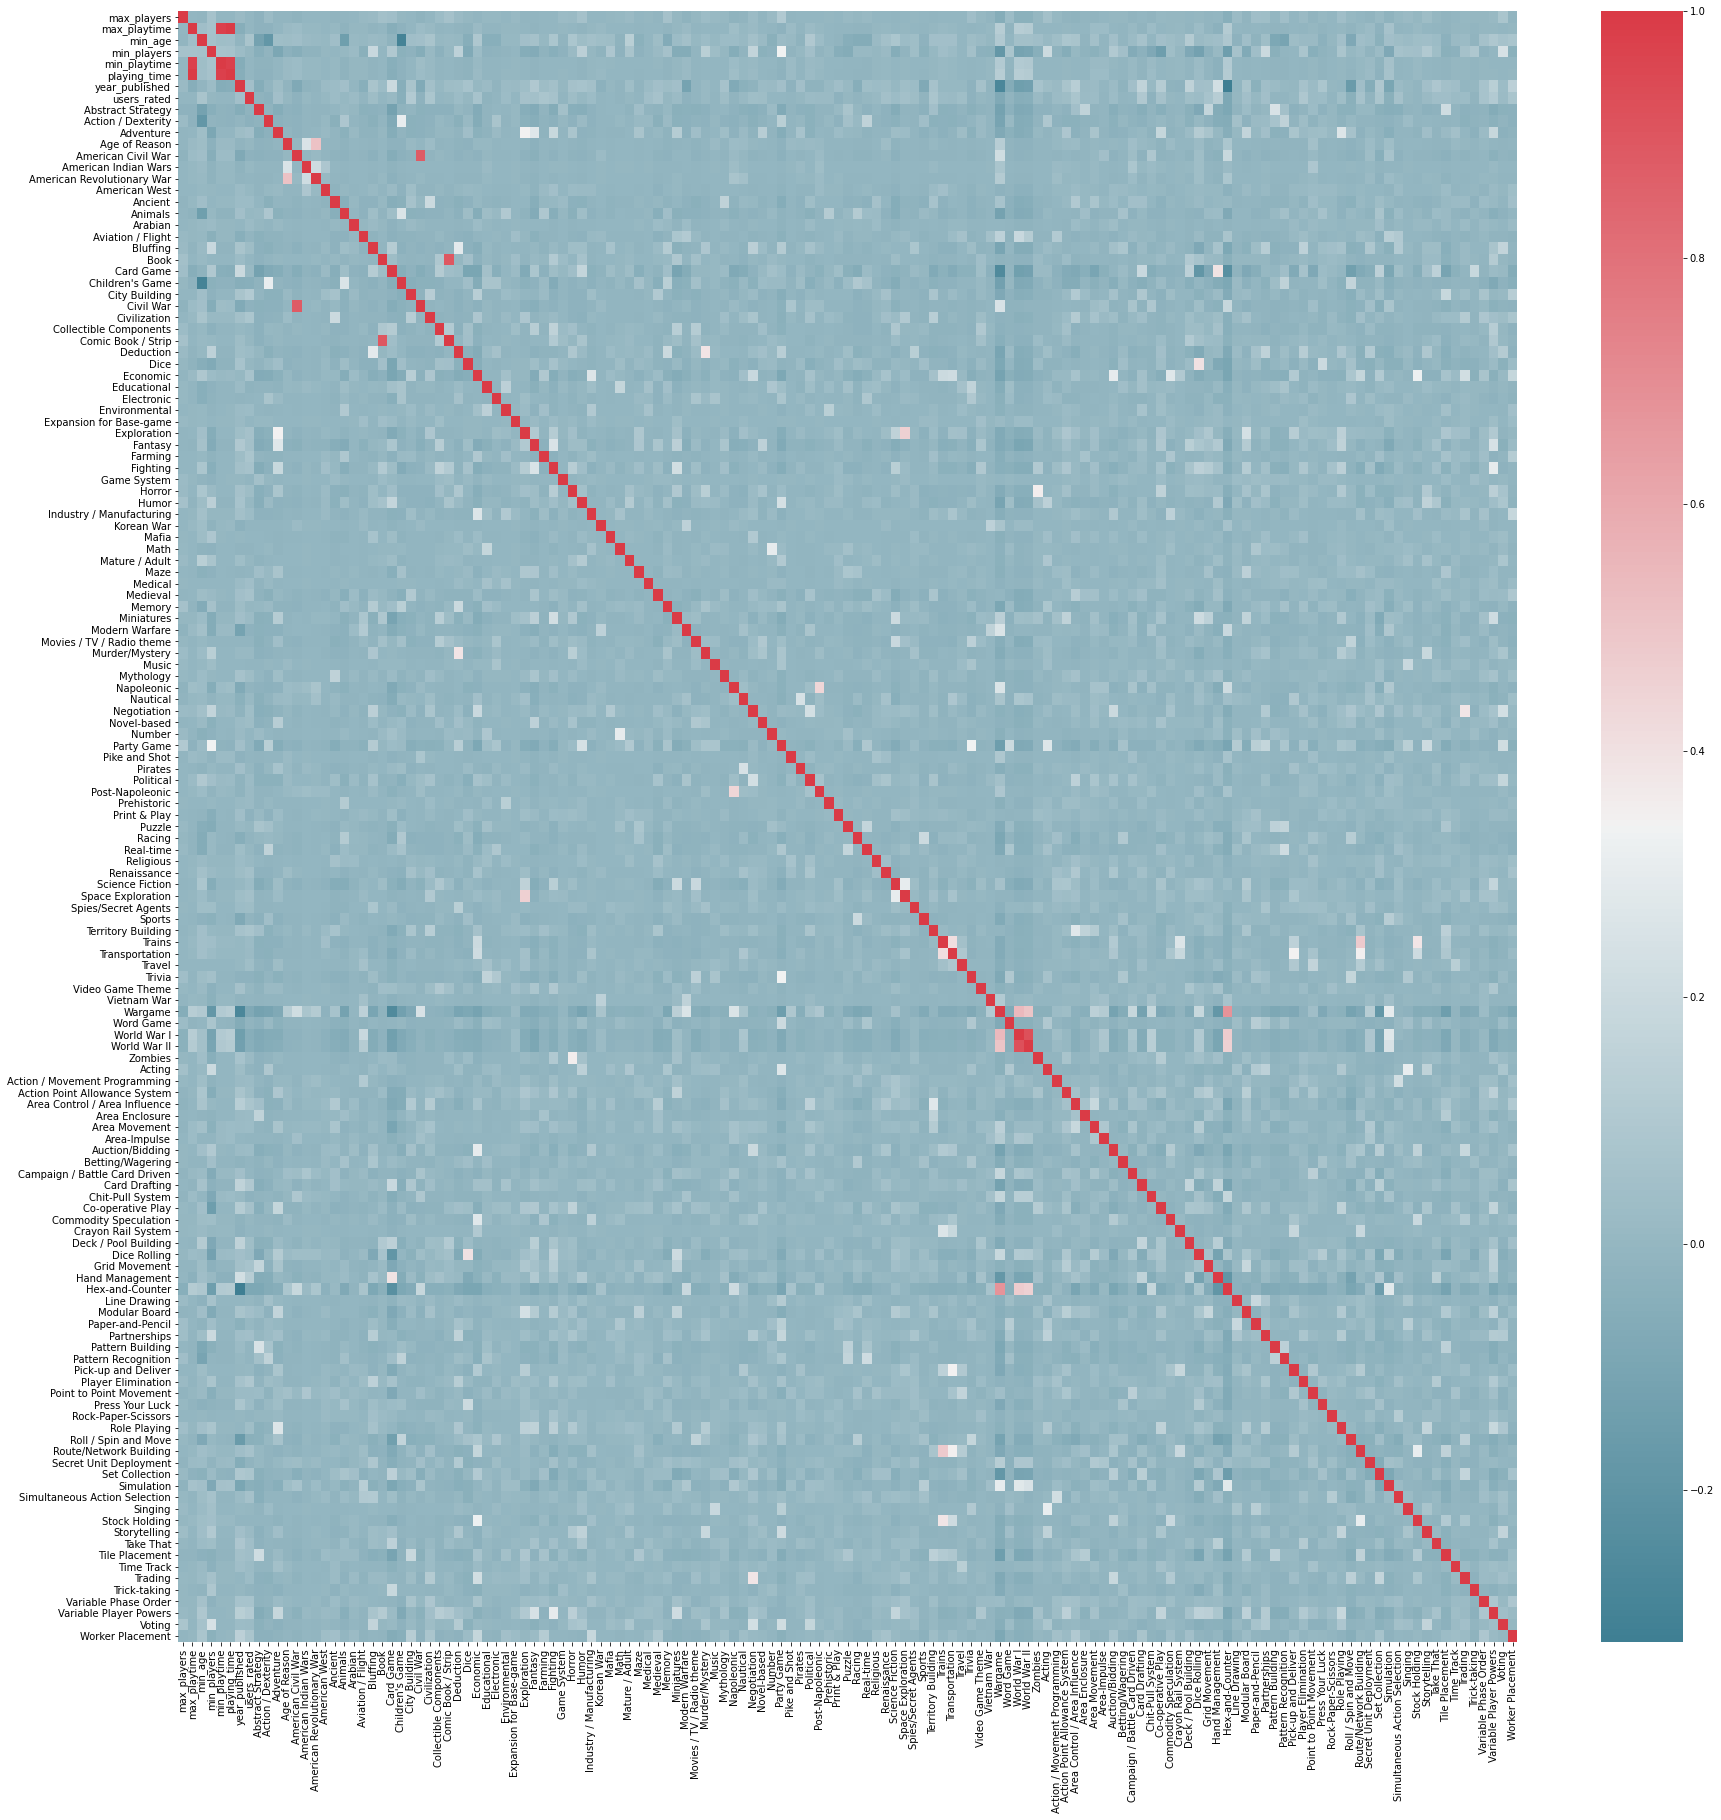

In [54]:
plt.figure(figsize = (30,30))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

## Setting up the validation framework

### Split data

In [29]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

len(df_train), len(df_val), len(df_test)

df_train = df_train.reset_index(drop=True)
df_val   = df_val.reset_index(drop=True)
df_test  = df_test.reset_index(drop=True)

y_full_train = df_full_train.average_rating.values
y_train = df_train.average_rating.values
y_val   = df_val.average_rating.values
y_test  = df_test.average_rating.values

del df_full_train['average_rating']
del df_train['average_rating']
del df_val['average_rating']
del df_test['average_rating']

In [30]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[game_col].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[game_col].to_dict(orient='records')
X_val = dv.transform(val_dict)

# Models

## DecisionTreeRegressor

### Define rmse 

In [33]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

### Depth optimisation 

In [34]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeRegressor(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict(X_val)
    error = rmse(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, error))

   1 -> 0.782
   2 -> 0.738
   3 -> 0.697
   4 -> 0.667
   5 -> 0.638
   6 -> 0.626
  10 -> 0.680
  15 -> 0.741
  20 -> 0.779
None -> 0.813


#### Depth of 4, 5 and 6 selected as these had the lowest error values

### Min_samples_leaf optimisation 

In [38]:
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)
    
        y_pred = dt.predict(X_val)
        error = rmse(y_val, y_pred)
        
        scores.append((depth, s, error))

In [39]:
columns = ['max_depth', 'min_samples_leaf', 'error']
df_scores = pd.DataFrame(scores, columns=columns)

In [40]:

df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['error'])
df_scores_pivot.round(3)

error              
max_depth             4      5      6
min_samples_leaf                     
1                 0.667  0.638  0.625
5                 0.667  0.638  0.626
10                0.666  0.637  0.629
15                0.667  0.636  0.625
20                0.667  0.636  0.623
100               0.667  0.640  0.631
200               0.669  0.649  0.642
500               0.678  0.674  0.671

### Plot error for max_depth and min_samples_leaf parameters

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

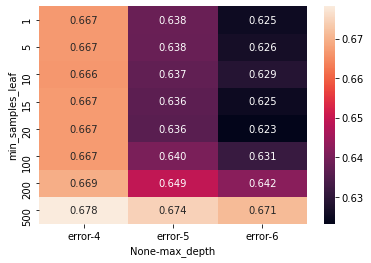

In [41]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

### Select optimal DecisionTreeRegressor parameters  

In [42]:
dt = DecisionTreeRegressor(max_depth=6, min_samples_leaf=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6)

#### Print feature names

In [43]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- year_published <= 2009.50
|   |--- max_playtime <= 135.00
|   |   |--- users_rated <= 801.50
|   |   |   |--- Wargame <= 0.50
|   |   |   |   |--- Roll / Spin and Move <= 0.50
|   |   |   |   |   |--- users_rated <= 105.50
|   |   |   |   |   |   |--- value: [5.70]
|   |   |   |   |   |--- users_rated >  105.50
|   |   |   |   |   |   |--- value: [5.98]
|   |   |   |   |--- Roll / Spin and Move >  0.50
|   |   |   |   |   |--- users_rated <= 137.50
|   |   |   |   |   |   |--- value: [5.26]
|   |   |   |   |   |--- users_rated >  137.50
|   |   |   |   |   |   |--- value: [5.59]
|   |   |   |--- Wargame >  0.50
|   |   |   |   |--- year_published <= 1993.50
|   |   |   |   |   |--- Miniatures <= 0.50
|   |   |   |   |   |   |--- value: [6.16]
|   |   |   |   |   |--- Miniatures >  0.50
|   |   |   |   |   |   |--- value: [6.73]
|   |   |   |   |--- year_published >  1993.50
|   |   |   |   |   |--- Hex-and-Counter <= 0.50
|   |   |   |   |   |   |--- value: [6.47]
|   |   |   |   

## RandomForestRegressor


### Optimise n_estimators

In [44]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    error = rmse(y_val, y_pred)
    
    scores.append((n, error))

In [46]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'error'])

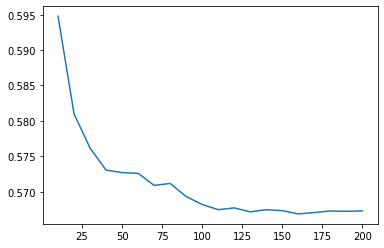

In [47]:
plt.plot(df_scores.n_estimators, df_scores.error)

### Optimise depth

In [56]:
scores = []
for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        error = rmse(y_val, y_pred)
    
        scores.append((d, n, error))

In [57]:
columns = ['max_depth', 'n_estimators', 'error']
df_scores = pd.DataFrame(scores, columns=columns)

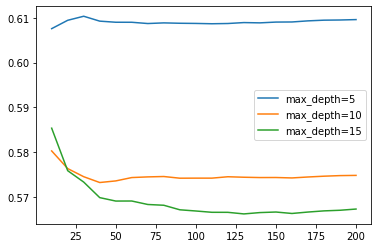

In [58]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.error,
             label='max_depth=%d' % d)

plt.legend()

In [59]:
max_depth = 15

### Optimise min_samples_leaf

In [60]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        error = rmse(y_val, y_pred)
    
        scores.append((s, n, error))

In [61]:
columns = ['min_samples_leaf', 'n_estimators', 'error']
df_scores = pd.DataFrame(scores, columns=columns)

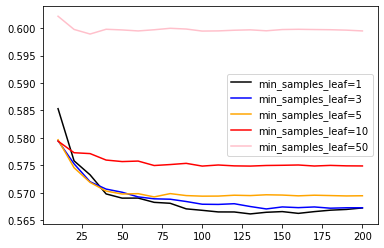

In [62]:
colors = ['black', 'blue', 'orange', 'red', 'pink']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.error,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [63]:
min_samples_leaf = 1


### Final RandomForestRegressor model  

In [67]:
rf = RandomForestRegressor(n_estimators=125,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=125, random_state=1)

## Validating the model using df_full train v df_test

In [68]:
dv = DictVectorizer(sparse=False)

full_train_dict = df_full_train[game_col].to_dict(orient='records')
X_full_train = dv.fit_transform(full_train_dict)

test_dict = df_test[game_col].to_dict(orient='records')
X_test = dv.transform(test_dict)

### Testing DecisionTreeRegressor

In [69]:
dt.fit(X_full_train, y_full_train)
    
y_pred = dt.predict(X_val)
error  = rmse(y_test, y_pred)
        
error

1.0259375764878897

<AxesSubplot:ylabel='Count'>

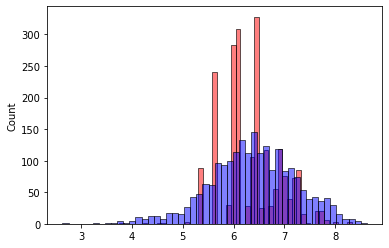

In [70]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_test, color='blue', alpha=0.5, bins=50)

### Testing RandomForestRegressor

In [71]:
rf.fit(X_full_train, y_full_train)

y_pred = rf.predict(X_test)
error  = rmse(y_test, y_pred)
error

0.5762628848890984

<AxesSubplot:ylabel='Count'>

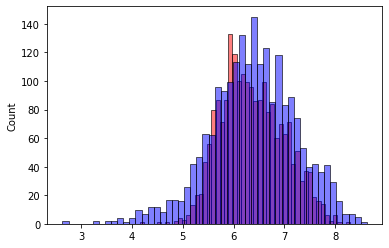

In [72]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_test, color='blue', alpha=0.5, bins=50)